In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [3]:
df = pd.read_parquet("../data/processed/cleaned.parquet")

# Variable Comparison between class labels

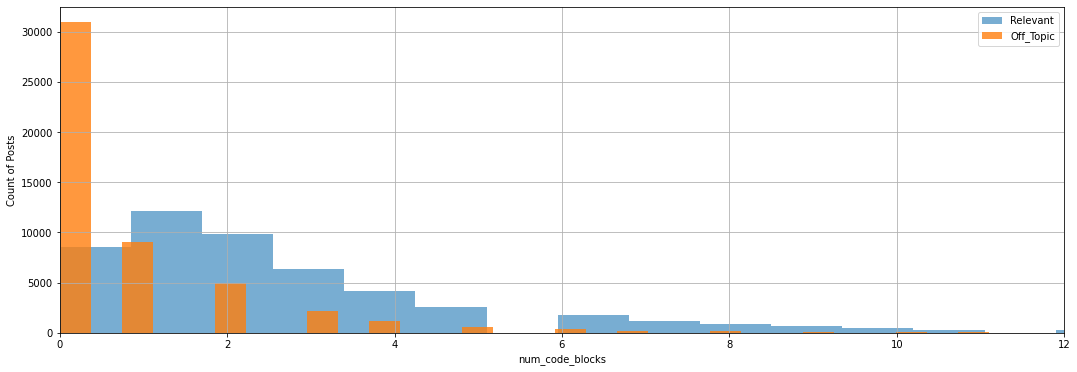

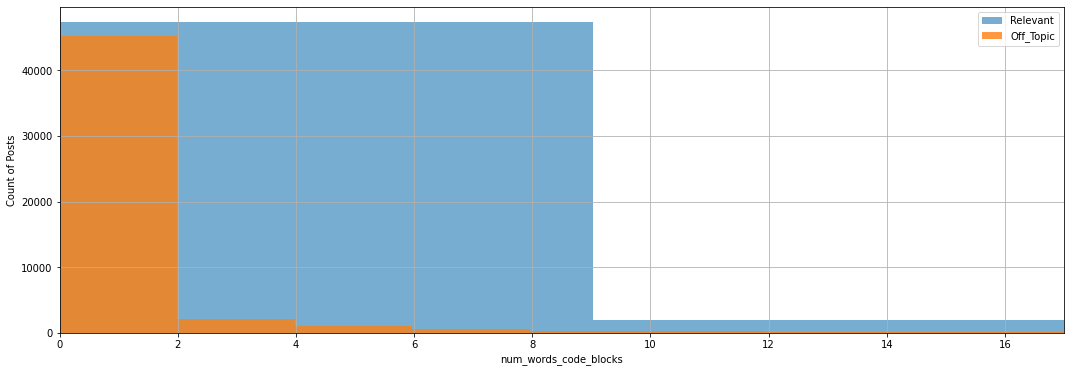

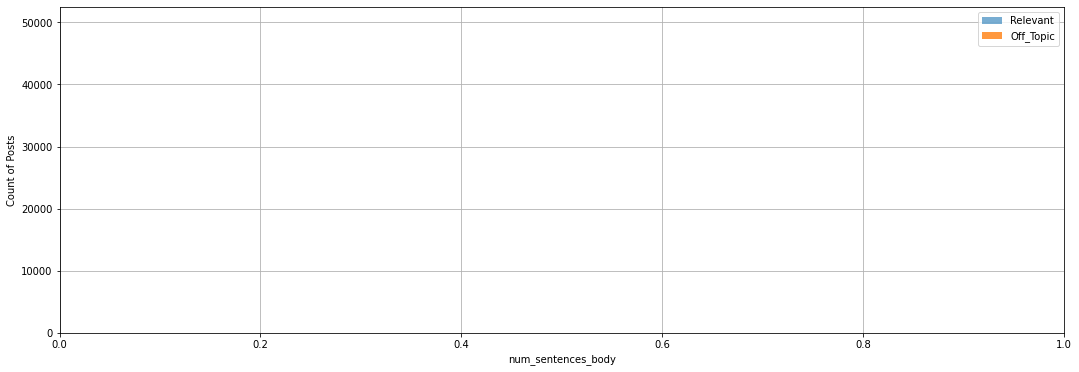

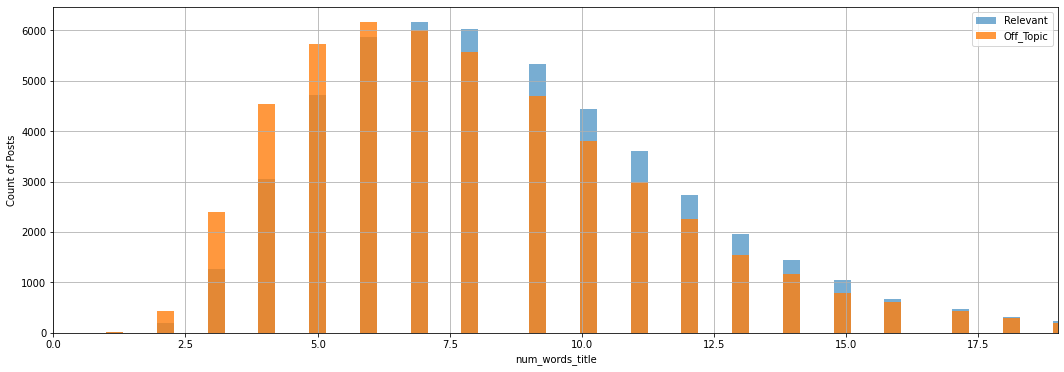

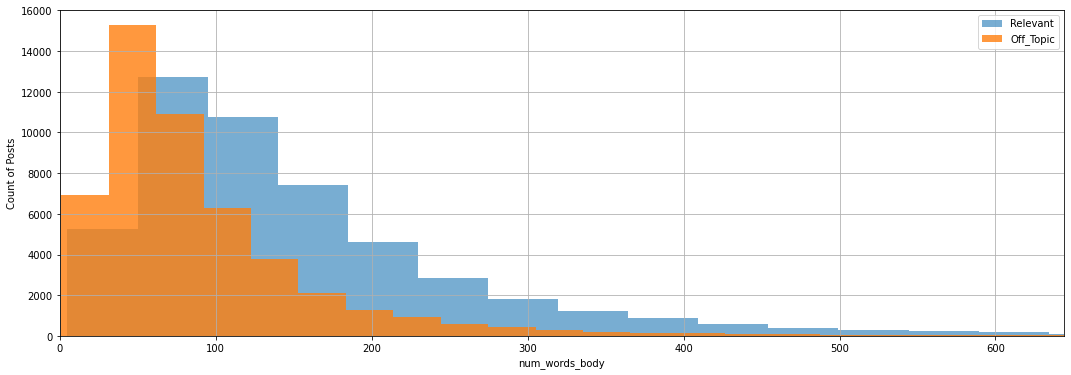

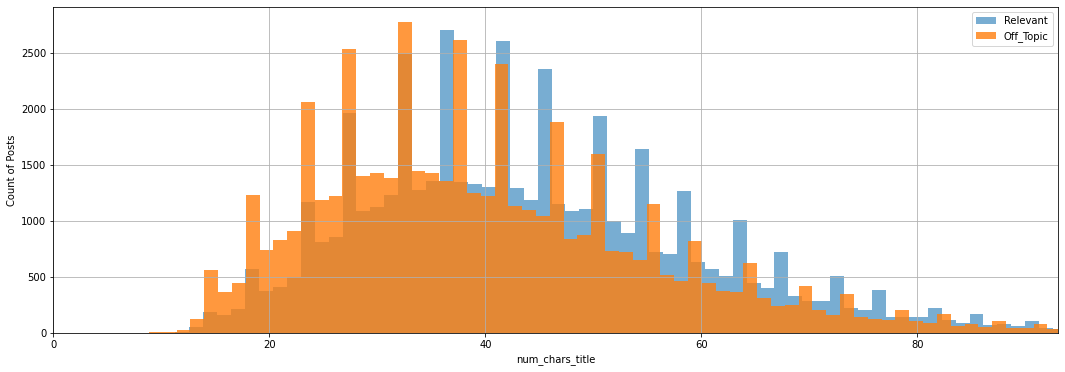

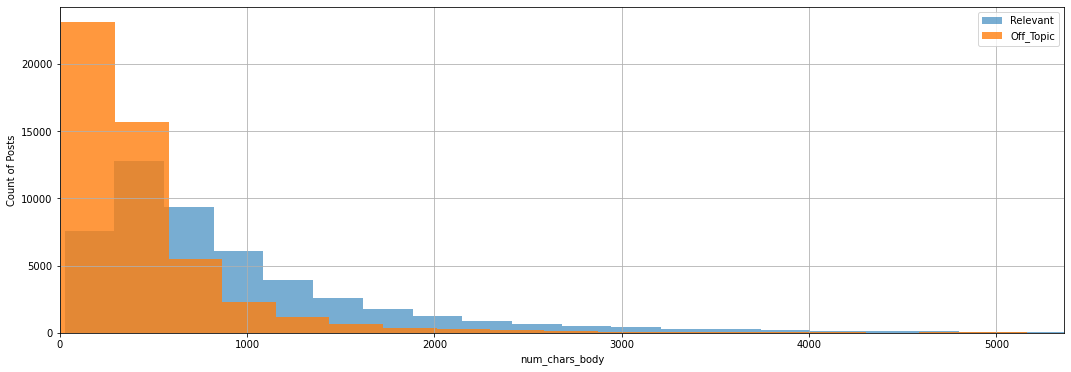

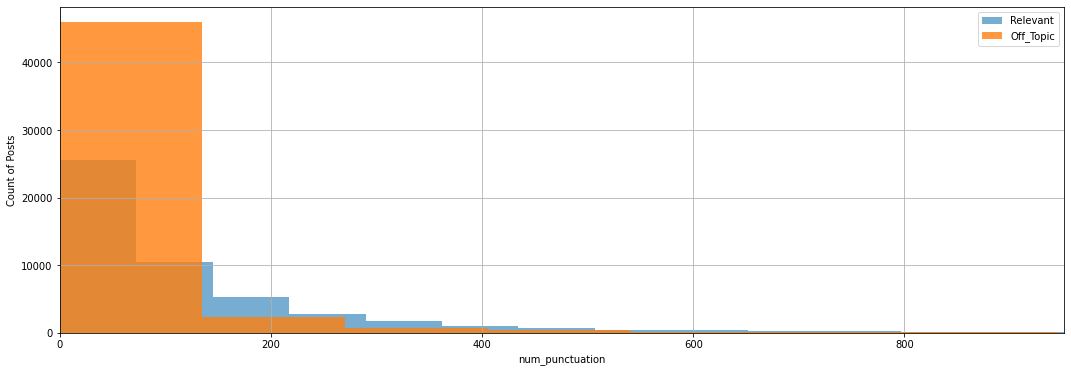

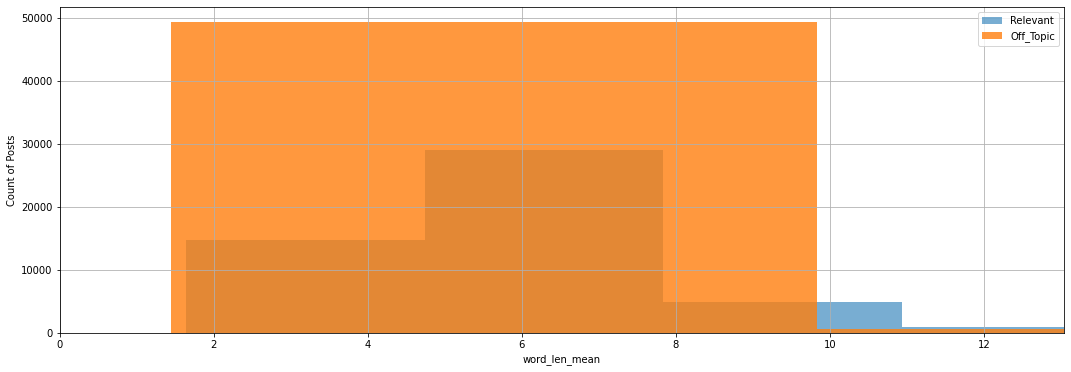

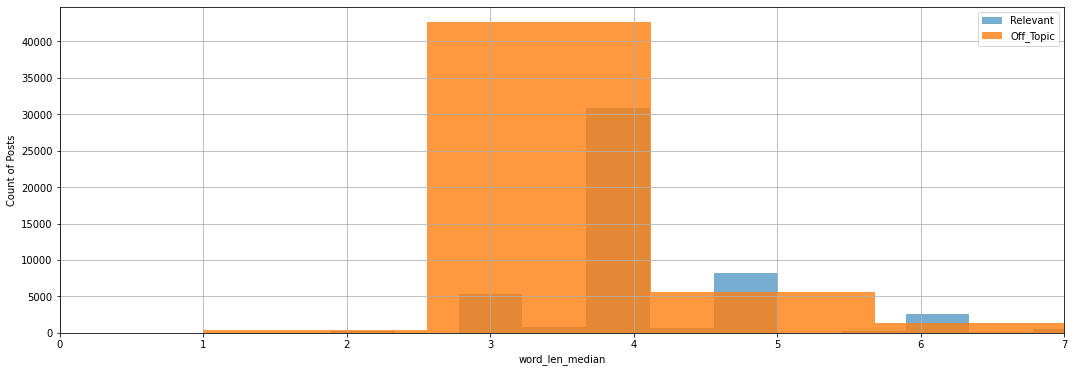

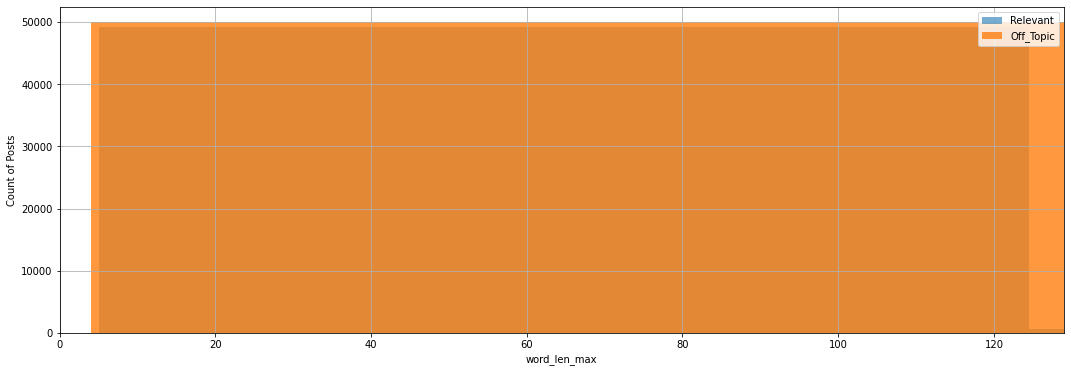

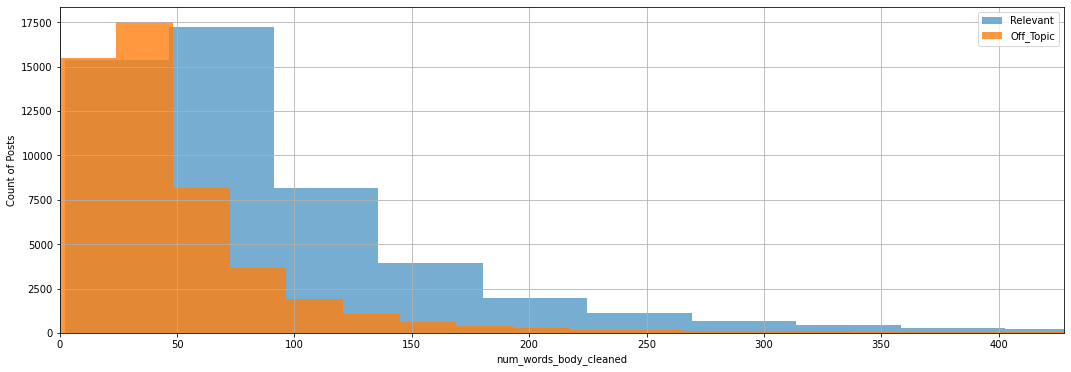

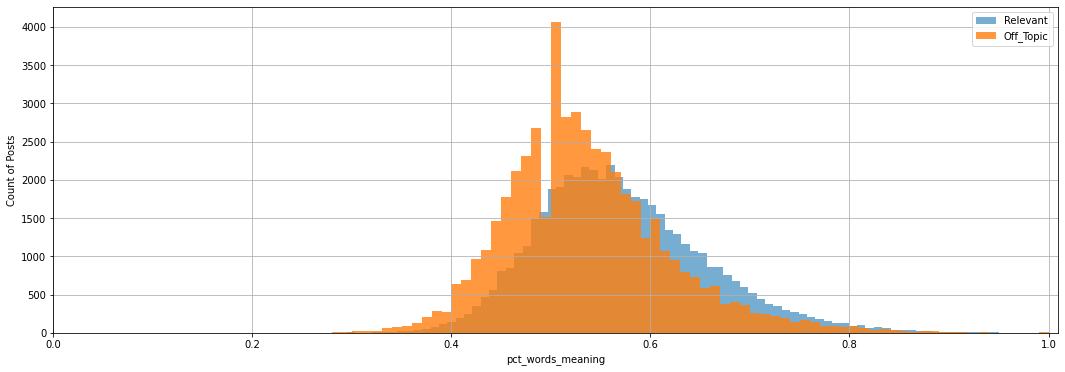

In [12]:

plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 100

for col, x in enumerate(df.dtypes):
    if x != "object" and df.columns[col] != "label":
        col_nm = df.columns[col]
        plt.hist(df[df['label'] == 0][col_nm], alpha = 0.6, bins=bins, label='Relevant')
        plt.hist(df[df['label'] == 1][col_nm], alpha = 0.8, bins=bins, label='Off_Topic')
        plt.xlabel(col_nm)
        plt.ylabel('Count of Posts')
        plt.legend(loc='upper right')
        
        if df[col_nm].max() > 10:
            plt.xlim(0,df[col_nm].quantile(0.99))
        else:
            plt.xlim(0,df[col_nm].max())
        plt.grid()
        plt.show()


# Word Clouds

In [5]:
corpus_0 = df[df.label == 0].cleaned_body.to_list()
corpus_1 = df[df.label == 1].cleaned_body.to_list()

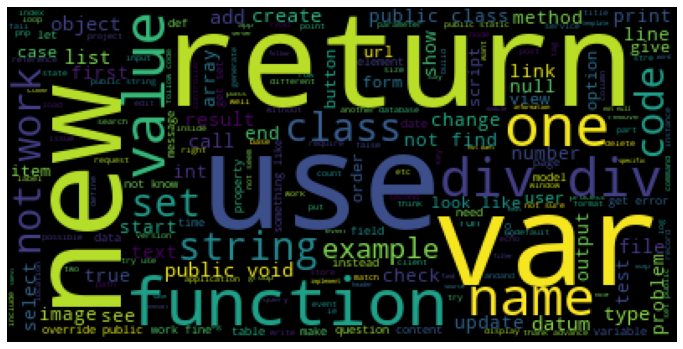

In [6]:
plt.figure(figsize=(12, 8))
word_cloud = WordCloud(background_color="black", max_font_size=80).generate(
    " ".join(corpus_0)
)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()


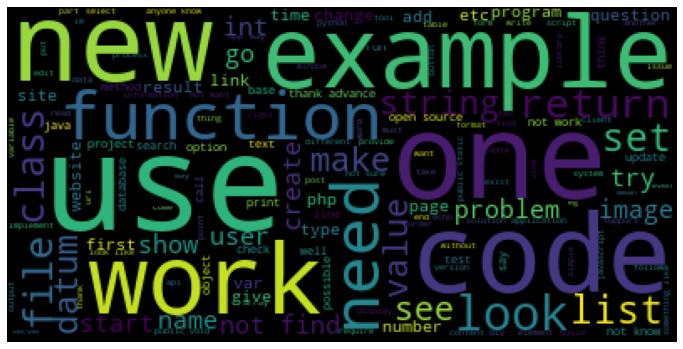

In [7]:
plt.figure(figsize=(12, 8))
word_cloud = WordCloud(background_color="black", max_font_size=80).generate(
    " ".join(corpus_1)
)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
